<a href="https://www.youtube.com/channel/UC80kXszNqAdWGTHFBcOKVdg"><img src="https://lh3.googleusercontent.com/3BGYLiEKEvFZ0u6eLcDbKvad__jwIRs30D19_ttfwuMv2TrJ3qovD_Lb_HGF4QvSCeVYoE2Ay6Hkfx0wN0LFV1VvILg7XIdrqR7bE9EtnbF2SwYIueV1-B33aomEwjTmkAKDY4TYopVfaSbfsBWzwfOXpoKy_ASFSrjKt_2p_E35fyTkTbES2t9GUnZ25bMjAe_Y4xqfkw-8lRqK9zCYVwlcD_e2YXUlNXs8ubJCHwZp3MAdPL3kWzLMnuVAKsiORvjt_IgCVINNcDAqfak56arvmtg4MXpcbyKSeYK2A33p0jcFnOkgddq3KhABVNqb0PRM7inpysBXMJ7-u7Q__Y4LVGdFh_gTmuPcxHQZXqS10kU_K86bOQtgqY5m9DjJ5Ixd--sxiR4evRr4LnjDH-9L-6Rcu4EZI6LXMxlANCuFGuTLgIIqrq6qgIliinjuxyuwsX-cl-pE_Y3TBcZ5dum52_O8HtkuPo3NOQXD0Pg4ZfQV11CSkeD-82HaONupDREROrrgFOriOYljzSj4438GSaK4IUTfDjP1UFMKnA6QuZGhSA0noStBSeIwTitSUsHbspxGwYm05Of9UiP-vpvhB5zGDUWl2gLpPsXxz6SDNlDGsVFekX81jNOrFnDzj-Me98FgK4AAmW4Of6Z8LN1ZjBw1MdFwGabLN94tHUMg0sPf-UJFbw5XqN0spoltuB8YmAGSyIWLHoC4eVuARcEX=w1659-h300-no?authuser=0" align="center"></a>
# <center>Supervised Learning: **Klasifikasi Decision Tree**</center>

Praktikum ini bertujuan untuk memberikan pemahaman praktis mengenai salah satu metode klasifikasi **Decision Tree (DT)**. DT merupakan metode klasifikasi tersupervisi yang berbasis aturan pohon keputusan. Penjelasan rinci mengenai metode Decision Tree secara konseptual dapat disimak di video: https://youtu.be/KbSLvWaJFxQ.



**Pertama**, kita load dulu berbagai library yang diperlukan, yaitu:

1. Pandas (pd)
2. Numpy (np)
3. DecisionTreeClassifier dari sklearn.tree





In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### Dataset

Pada praktikum ini, kita akan menggunakan dataset **Computer-Buys**. Dataset tersebut merupakan dataset berlabel biner yang sering digunakan dalam pembelajaran Machine Learning. 

Dataset ini terdiri dari 4 atribut yaitu Age, Income, Student, dan CreditRating; serta sebuah label yang menyatakan seseorang membeli komputer (yes) atau tidak (no). Jumlah data hanya 14 baris data.

Kita akan mengunduh dataset dari repository eksternal. Kita akan unduh dari [kumpulan dataset](https://github.com/achmatim/data-mining/tree/main/Dataset) di laman https://github.com/achmatim/data-mining/blob/main/Dataset/computer_buys.csv.

**Catatan**: kalo dataset berada di komputer lokal, dan kita menggunakan Jupyter maka tidak perlu menjalankan perintah **wget** ini, cukup dengan perintah **read_csv()** dengan parameter path/to/file.csv.

In [2]:
!wget -O computer_buys.csv https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/computer_buys.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Load Dataset

In [58]:
df = pd.read_csv('computer_buys.csv', delimiter=";", encoding="unicode_escape")
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31-40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


# Visualisasi dan Analisis Data 



#### Coba kita tampilkan jumlah data per label 

In [19]:
#jumlah data
jumdata = len(df.index)
print(jumdata)
df['buys_computer'].value_counts()

14


yes    9
no     5
Name: buys_computer, dtype: int64

#### Total Data = 14, buys_computer (yes=9, no=5)


Kita juga dapat menampilkan visualisasi data dari atribut tersebut, contohnya:

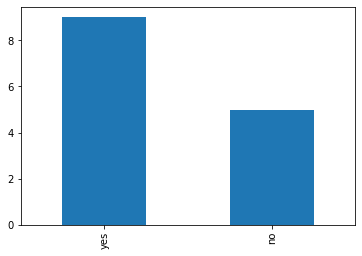

In [20]:
df['buys_computer'].value_counts().plot(kind = 'bar')

### Latihan

Coba tampilkan statistik jumlah data untuk setiap kategori pada atribut "age", "income", "student" dan "credit_rating"

In [ ]:
# tuliskan kode di sini

## Data Pre-processing

### Konversi Format DataFrame (Panda) ke Numpy

Selanjutnya, kita format dataset, yaitu bentuk **feature sets** (kumpulan atribut), kita bentuk variabel **X**:

In [21]:
df.columns

Index(['age', 'income', 'student', 'credit_rating', 'buys_computer'], dtype='object')

Untuk menggunakan library scikit-learn library, kita harus convert format data frame-nya Panda, ke array **Numpy** :

In [28]:
X = df[['age', 'income', 'student', 'credit_rating']] .values  #.astype(float)
X[0:5]


array([['<=30', 'high', 'no', 'fair'],
       ['<=30', 'high', 'no', 'excellent'],
       ['31-40', 'high', 'no', 'fair'],
       ['>40', 'medium', 'no', 'fair'],
       ['>40', 'low', 'yes', 'fair']], dtype=object)

Definisikan Labelnya juga (Y): 

In [26]:
y = df['buys_computer'].values
y[0:5]

array(['no', 'no', 'yes', 'yes', 'yes'], dtype=object)

### Ubah nilai data kategorikal ke numerik

Metode Decision Tree pada Sklearn hanya menerima jenis data numerik, sehingga kita harus mengubah data kategorikal menjadi numerik terlebih dahulu

In [34]:
from sklearn import preprocessing
le_age = preprocessing.LabelEncoder()
le_age.fit(['<=30','31-40','>40'])
X[:,0] = le_age.transform(X[:,0])

ValueError: y contains previously unseen labels: 1

In [35]:
#'income', 'student', 'credit_rating'
le_income = preprocessing.LabelEncoder()
le_income.fit(['high','medium','low'])
X[:,1] = le_income.transform(X[:,1])

le_student = preprocessing.LabelEncoder()
le_student.fit(['yes','no'])
X[:,2] = le_student.transform(X[:,2])

le_credit = preprocessing.LabelEncoder()
le_credit.fit(['fair','excellent'])
X[:,3] = le_credit.transform(X[:,3])

Sekarang coba kita tampilkan lagi datanya

In [37]:
X

array([[1, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [2, 2, 0, 1],
       [2, 1, 1, 1],
       [2, 1, 1, 0],
       [0, 1, 1, 0],
       [1, 2, 0, 1],
       [1, 1, 1, 1],
       [2, 2, 1, 1],
       [1, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 0, 1, 1],
       [2, 2, 0, 0]], dtype=object)

### Pembagian Data Training dan Testing  
Untuk menghasilkan model yang baik, perlu dilakukan pengujian yang baik. Aturan umum yang berlaku adalah data training dan testing harus dipisahkan terlebih dahulu. Dengan kata lain tidak boleh menggunakan data yang sama untuk training dan testing.

Pembagian dataset dapat dilakukan dengan mekanisme A atau B seperti tersaji pada gambar berikut:
<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/ML_dataset_training_validation_test_sets.png"/>

Untuk mempermudah, kali ini kita pake skenario A, hanya membagi dataset menjadi data training dan testing. Untuk komposisi yang digunakan sebesar **80% data training dan 20% data testing**.


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (11, 4) (11,)
Test set: (3, 4) (3,)


# Implementasi Metode Klasifikasi 

## Decision Tree

#### Import library 

Library Decision Tree sudah kita import di bagian awal praktikum ini, jadi tidak perlu mengimport kembali

In [ ]:
# from sklearn.tree import KNeighborsClassifier

### Training

Pertama, lakukan train dengan model DT:

In [46]:
mTree = DecisionTreeClassifier(criterion="entropy")
#mTree

mTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

### Predicting
Kita sudah dapat menggunakan model yang terbentuk untuk memprediksikan data

In [47]:
predTree = mTree.predict(X_test)

In [54]:
print(predTree[0:2])
print(y_test[0:2])

['yes' 'no']
['yes' 'yes']


### Perhitungan Akurasi
Pada klasifikasi, __nilai akurasi klasifikasi__ secara sederhana dapat dihitung dengan memperbandingkan kelas **hasil prediksi** algoritma dengan kelas sebenarnya / **actual class**.

In [55]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(predTree, y_test))

Test set Accuracy:  0.6666666666666666


## Visualisasi Decision Tree

Kita dapat membuat visualisasi Decision Tree yang terbentuk. Berikut ini contoh code nya:

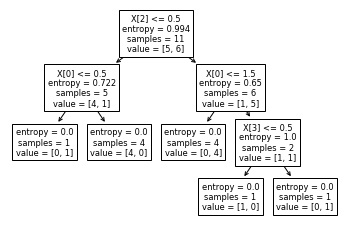

In [63]:
from sklearn import tree

tree.plot_tree(mTree);

Memunculkan nama atribut-nya:

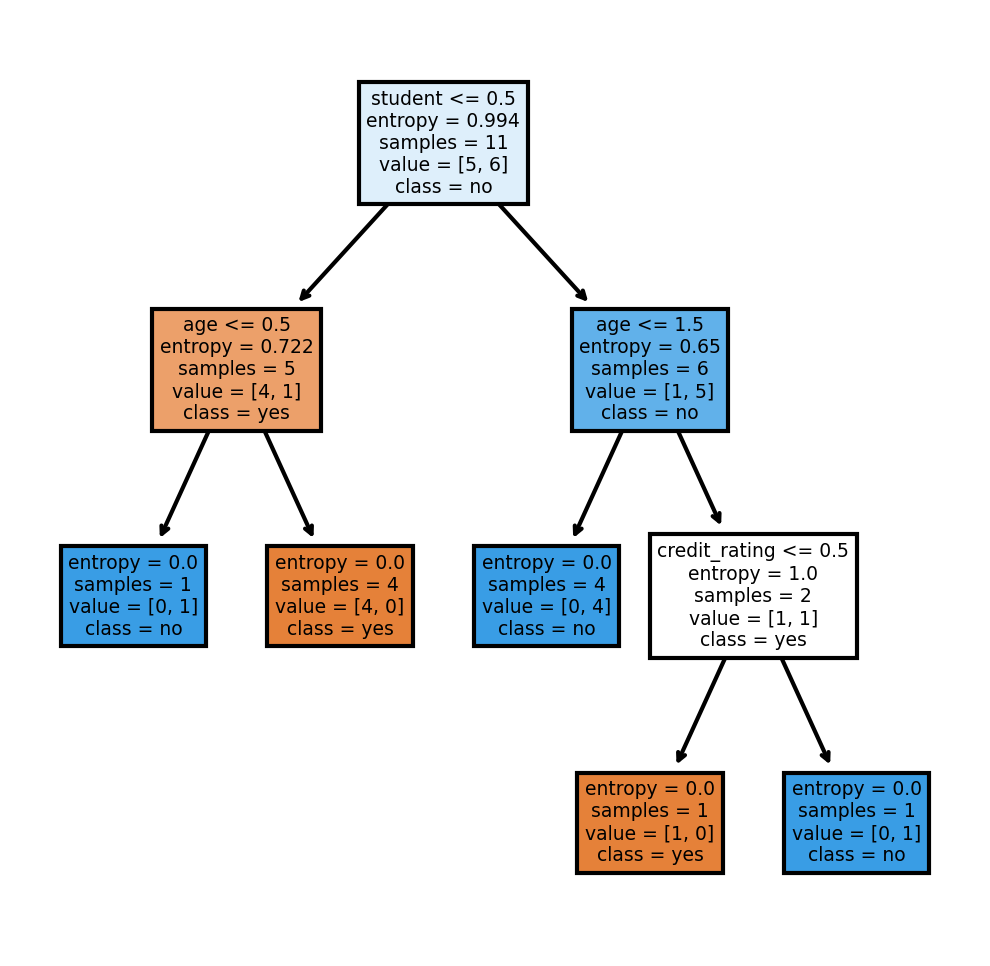

In [64]:
fn=['age','income','student','credit_rating']
cn=['yes', 'no']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(mTree,
               feature_names = fn, 
               class_names=cn,
               filled = True);

## Ingin belajar lebih banyak lagi?

Banyak video pembelajaran terkait Machine Learning yang disajikan di channel Youtube http://youtube.com/c/AchmadSolichin. Silahkan berkunjung dan jangan lupa **SUBSCRIBE** untuk membantu pengembangan channel dengan video-video berkualitas lainnya.

### Terima kasih, selamat belajar!

Lab ini dibuat oleh: <a href = "http://achmatim.net">Dr. Achmad Solichin</a> dengan acuan dari berbagai sumber.

<hr>
Copyright &copy; 2021 [Achmatim.Net](http://achmatim.net). This notebook and its source code are released under the terms of the CC License.​